In [3]:
from pathlib import Path
import os, sys

# Make this path be the project's "base" directory, so we can include modules
notebook_directory_ancestor = Path.cwd().resolve().parent.parent.parent
print(notebook_directory_ancestor)
core_code_directory = notebook_directory_ancestor / "CoreCode/"

is_core_code_directory_in_sys_path = str(core_code_directory) in sys.path
is_notebook_directory_ancestor_in_sys_path = str(notebook_directory_ancestor) in sys.path
print("Is CoreCode directory in sys.path?", is_core_code_directory_in_sys_path)
print("Is notebook directory's ancestor in sys.path?", is_notebook_directory_ancestor_in_sys_path)

if not is_core_code_directory_in_sys_path:
    sys.path.append(str(core_code_directory))

/InServiceOfX
Is CoreCode directory in sys.path? True
Is notebook directory's ancestor in sys.path? False


In [4]:
from CoreCode.FileIO.get_filepaths import get_filepaths
from CoreCode.Utilities.LoadEnvironmentFile import load_environment_file
load_environment_file()

In [6]:
#os.environ["OCTOAI_API_TOKEN"]

https://colab.research.google.com/drive/1CwZac3YPuujsQLyP_DoNqgttA0X9rMMT?usp=sharing#scrollTo=58b66a05-d7ff-4987-9444-15bc0892f9d0

Rely on the OctoAIEndpoint LLM by adding the following.

In [3]:
from langchain.llms.octoai_endpoint import OctoAIEndpoint

In [4]:
import json
from langchain.llms.octoai_endpoint import OctoAIEndpoint
from langchain.output_parsers import PydanticOutputParser
from langchain import PromptTemplate, LLMChain
from pydantic import BaseModel, Field
from typing import List

In [6]:
temperature = 0.01
max_tokens = 1024
# OctoAI LLM endpoint
llm = OctoAIEndpoint(
    model = "meta-llama-3-70b-instruct",
    max_tokens = max_tokens,
    temperature = temperature
)

/usr/local/lib/python3.10/dist-packages/langchain_core/utils/utils.py:161: UserWarning: WARNING! model is not default parameter.
                model was transferred to model_kwargs.
                Please confirm that model is what you intended.
  warnings.warn(


ImportError: Could not import openai python package. Please install it with `pip install openai`.

## 3. Animate the images with Stable Video Diffusion 1.1 hosted on OctoAI

https://colab.research.google.com/drive/1CwZac3YPuujsQLyP_DoNqgttA0X9rMMT#scrollTo=fd988959-366b-4434-ab3f-04de45b80d2a

In [12]:
from PIL import Image
from io import BytesIO
from base64 import b64encode, b64decode
from octoai import client as octo_client
from pathlib import Path

# Instantiate the OctoAI SDK image generator
octo_client = octo_client.OctoAI(api_key=os.environ["OCTOAI_API_TOKEN"])

# We'll need this helper to convert PIL images into a base64 encoded string
def image_to_base64(image: Image) -> str:
  buffered = BytesIO()
  image.save(buffered, format="JPEG")
  img_b64 = b64encode(buffered.getvalue()).decode("utf-8")
  return img_b64

In [8]:
scene_image_1 = Path(
    "/Data/Private/Lady/American/Blonde/Seeking/LosAngeles/Filtered/Fashion/MaudeMongeauTheMansionXRedDressArmBack.png"
)
print(scene_image_1.exists())


True


In [7]:
scene_image_2 = Path(
    "/Data/Private/Lady/American/Blonde/Seeking/LosAngeles/Filtered/Swimsuit/Ready/MaudeMongeauTheMansionXWhiteBikiniSwaying.png"
)
print(scene_image_2.exists())


True


In [6]:
scene_image_3 = Path(
    "/Data/Private/Lady/American/Blonde/Seeking/LosAngeles/Filtered/Selfie/Ready/MaudeMongeauInServiceOfXAgainstWall.png"
)
print(scene_image_3.exists())

True


In [9]:
final_still = Image.open(scene_image_3)

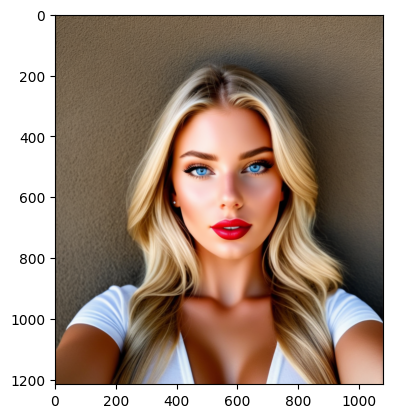

In [20]:
import matplotlib.pyplot as plt
plt.imshow(final_still)

In [15]:
# Generate a video for the final  presentation (it'll be used in the intro and at the end)
video_resp = octo_client.image_gen.generate_svd(
    image=image_to_base64(final_still),
    steps=25,
    cfg_scale=3,
    fps=6,
    motion_scale=0.5,
    noise_aug_strength=0.02,
    num_videos=1,
    enable_safety=False
)
final_video = video_resp.videos[0]

ApiError: status_code: 400, body: {'message': 'Request will not be processed due to image triggering the NSFW filter.'}

In [14]:
print(help(octo_client.image_gen.generate_svd))

Help on method generate_svd in module octoai.image_gen.client:

generate_svd(*, image: str, height: Optional[int] = Ellipsis, width: Optional[int] = Ellipsis, cfg_scale: Optional[float] = Ellipsis, steps: Optional[int] = Ellipsis, motion_scale: Optional[float] = Ellipsis, noise_aug_strength: Optional[float] = Ellipsis, num_videos: Optional[int] = Ellipsis, fps: Optional[int] = Ellipsis, seed: Union[int, List[Optional[int]], NoneType] = Ellipsis, enable_safety: Optional[bool] = Ellipsis, force_asset_download: Optional[bool] = Ellipsis, force_asset_gpu_copy: Optional[bool] = Ellipsis, request_options: Optional[octoai.core.request_options.RequestOptions] = None) -> octoai.image_gen.types.video_generation_response.VideoGenerationResponse method of octoai.image_gen.client.ImageGenClient instance
    Generate videos in response to the given request.
    
    Parameters
    ----------
    image : str
        Starting point image encoded in base64 string.
    
    height : typing.Optional[int]